# TOPIC:- FOOD WASTAGE RE-DISTRIBUTION NETWORK.

 Idea:- It's a machine learning model that can predict how much food will be wasted at an event, just by knowing things like the event type, the season, and how many guests are coming. It's designed to help caterers ,restrudents order the right amount of food, which saves money and is also better for the environment by reducing the harmful greenhouse gases like methane which happens by the decomposition of the food waste in a region.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/food_wastage_data.csv")   # reading the file

## Step 1: Understanding The Data
•	The type of event (like a Wedding or Birthday)

•	The number of guests

•	The type of food served (Meat, Fruits, etc.)

•	The season

•	The actual amount of food that was wasted.


In [ ]:
df.sample(5)   #coloum view

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
373,Baked Goods,247,Social Gathering,348,Room Temperature,Regular,Summer,Finger Food,Suburban,Moderate,16
384,Dairy Products,261,Birthday,350,Room Temperature,Regular,All Seasons,Sit-down Dinner,Urban,Moderate,23
1570,Fruits,400,Social Gathering,500,Refrigerated,Regular,Winter,Sit-down Dinner,Suburban,Low,25
1577,Dairy Products,250,Corporate,350,Room Temperature,Regular,Winter,Finger Food,Urban,Moderate,20
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40


In [ ]:
df.shape  #no of rows and columns

(1782, 11)

In [ ]:
df.isnull().sum()  #how many null value is present

,0
Type of Food,0
Number of Guests,0
Event Type,0
Quantity of Food,0
Storage Conditions,0
Purchase History,0
Seasonality,0
Preparation Method,0
Geographical Location,0
Pricing,0


In [ ]:
df.info()  # name of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [ ]:
df.describe()  #no of numerical coloum.

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


In [ ]:
Avg= df.groupby("Event Type")
mean_waste_by_event = Avg["Wastage Food Amount"].mean()
print(mean_waste_by_event)

Event Type
Birthday            28.154891
Corporate           28.467961
Social Gathering    28.286334
Wedding             29.200913
Name: Wastage Food Amount, dtype: float64


In [ ]:
Avg_M= df.groupby("Event Type")
mean_waste_by_event = Avg_M["Wastage Food Amount"].median()
print(mean_waste_by_event)

Event Type
Birthday            27.0
Corporate           25.0
Social Gathering    27.0
Wedding             28.0
Name: Wastage Food Amount, dtype: float64


## mean wastage for each Event Type and each Food Type—we can do a pivot

In [ ]:
pivot = df.groupby(["Event Type","Type of Food"])["Wastage Food Amount"].mean().unstack()
pivot

Type of Food,Baked Goods,Dairy Products,Fruits,Meat,Vegetables
Event Type,,,,,
Birthday,27.787234,27.092105,29.478261,29.149425,26.666667
Corporate,29.616162,28.132231,28.471910,28.719424,26.850746
Social Gathering,29.149254,26.873874,28.611765,28.523810,28.148936
Wedding,28.500000,29.531646,31.376471,28.472441,28.218182


## STEP 2:- Exploring the data to find patterns. I made a bunch of charts to answer some simple questions:
•	Which events are the most wasteful?

•	Is there a link between the number of guests and the amount of waste?

•	What about the type of food?

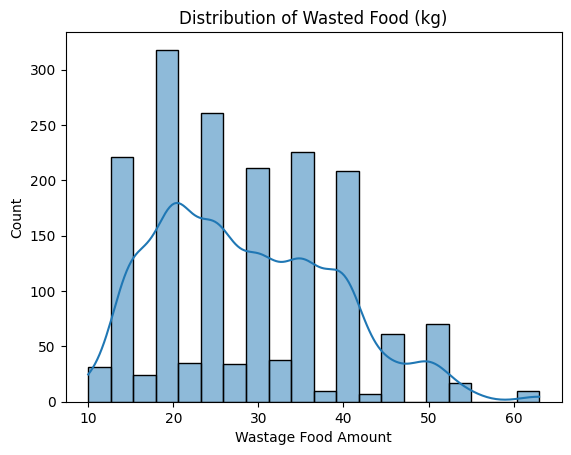

In [ ]:
# Univariate Analysis
# Distribution of Wastage Food Amount

sns.histplot(df["Wastage Food Amount"], bins=20, edgecolor='black',kde=True)
plt.title("Distribution of Wasted Food (kg)")
plt.show()

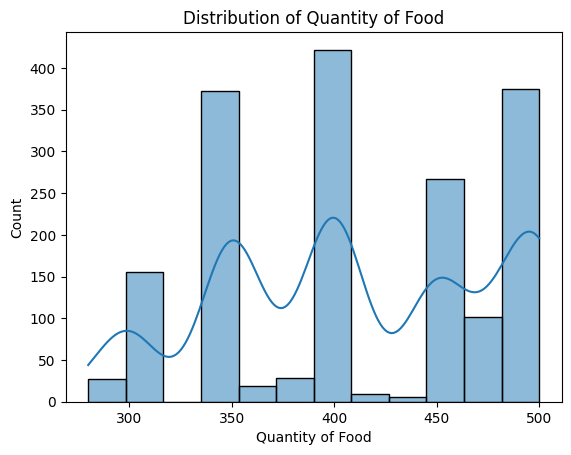

In [ ]:
sns.histplot(df["Quantity of Food"], kde=True)
plt.title("Distribution of Quantity of Food")
plt.show()

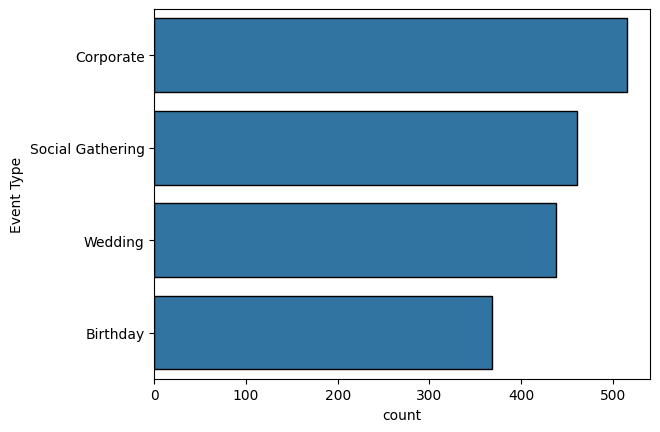

In [ ]:
# Counts of Event Types & Storage Conditions
event_type_counts = df["Event Type"].value_counts(ascending=False)
sns.countplot(data=df,y="Event Type",order=event_type_counts.index,edgecolor='black')
plt.show()

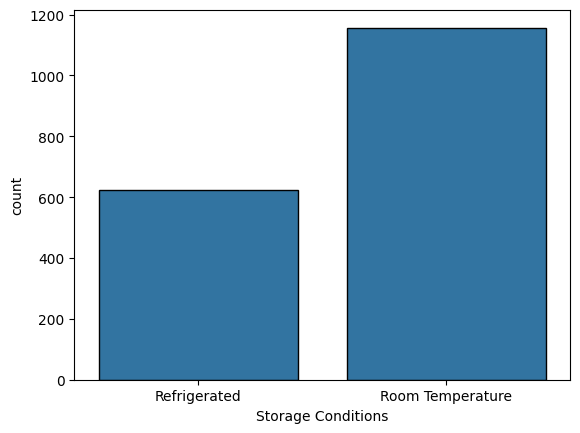

In [ ]:
sns.countplot(data=df,x="Storage Conditions",edgecolor='black')
plt.show()

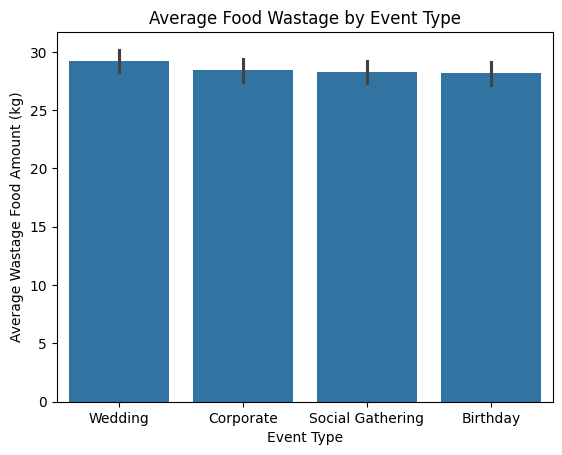

In [ ]:
avg_wastage_by_event = df.groupby('Event Type')['Wastage Food Amount'].mean().sort_values(ascending=False)

sns.barplot(data=df, x='Event Type', y='Wastage Food Amount', order=avg_wastage_by_event.index)
plt.title('Average Food Wastage by Event Type')
plt.ylabel('Average Wastage Food Amount (kg)')
plt.xlabel('Event Type')
plt.show()

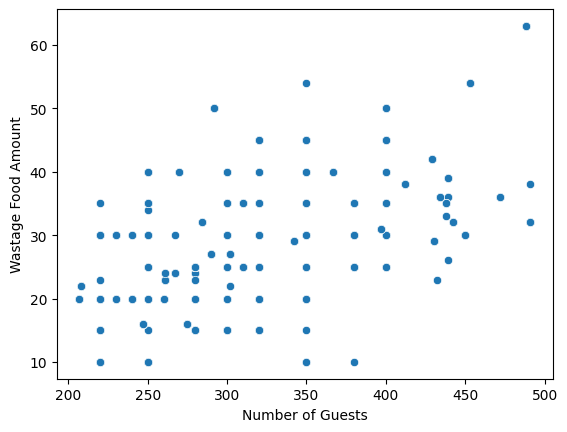

In [ ]:
# Bivariate Relationships
# Wastage vs. Number of Guests
sns.scatterplot(data=df,x="Number of Guests",
                y="Wastage Food Amount")
plt.show()

In [ ]:
Q1 = df["Wastage Food Amount"].quantile(0.25)
Q3 = df["Wastage Food Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df["Wastage Food Amount"] >= lower_bound) &
                    (df["Wastage Food Amount"] <= upper_bound)]

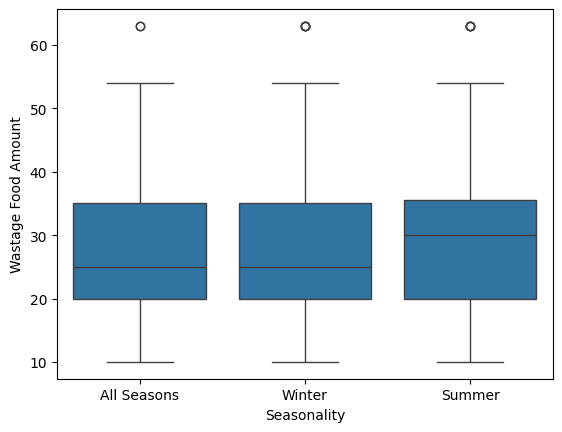

In [ ]:
# Boxplot of Wastage by Seasonality
sns.boxplot(data=df,x="Seasonality",
            y="Wastage Food Amount")
plt.show()

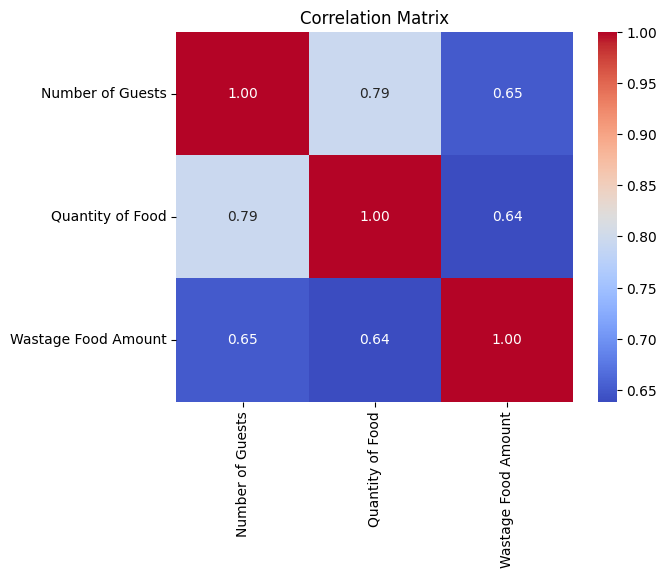

In [ ]:
corr = df[["Number of Guests","Quantity of Food","Wastage Food Amount"]].corr()
sns.heatmap(corr, annot=True,fmt='.2f', cmap="coolwarm")  # annote is used to write the value inside the matrix, fmt=.2f means 2 decimal places.
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Correlation matrix between numerical variables
cols = ["Number of Guests", "Quantity of Food", "Wastage Food Amount"]
correlation_matrix = df[cols].corr()

# Print the correlation matrix
correlation_matrix


,Number of Guests,Quantity of Food,Wastage Food Amount
Number of Guests,1.000000,0.794401,0.650421
Quantity of Food,0.794401,1.000000,0.638648
Wastage Food Amount,0.650421,0.638648,1.000000


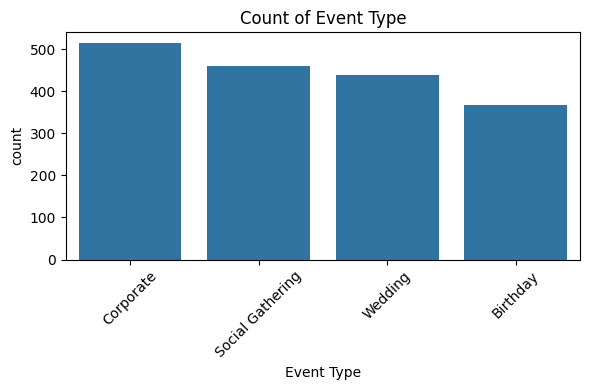

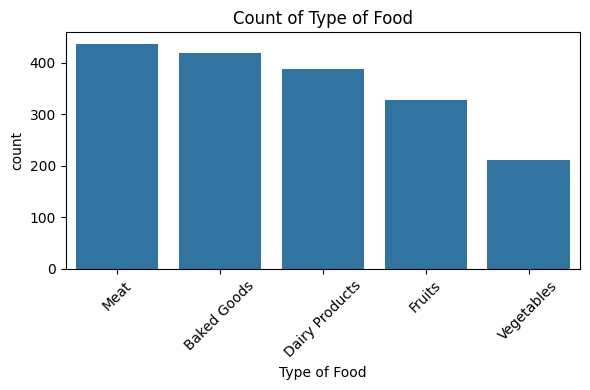

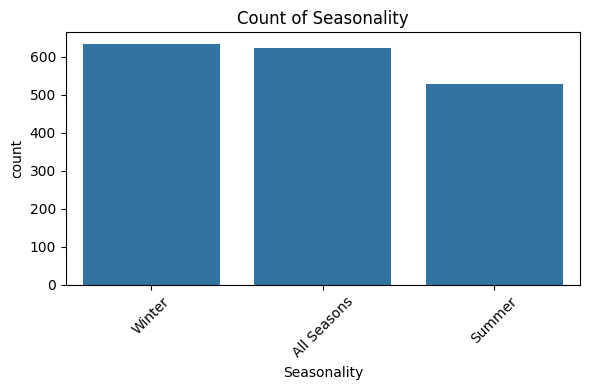

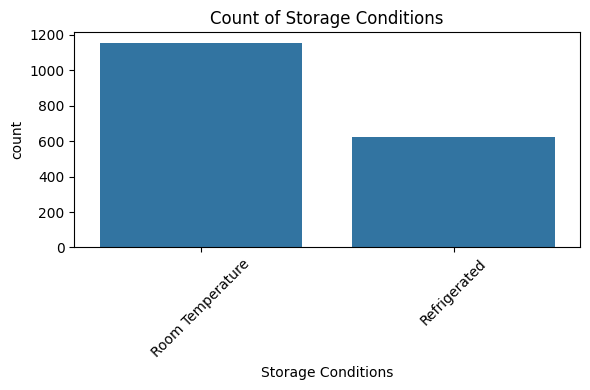

In [ ]:
for col in ["Event Type","Type of Food","Seasonality","Storage Conditions"]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

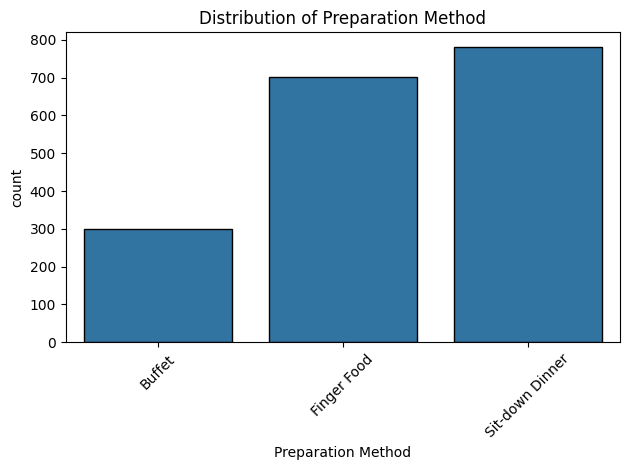

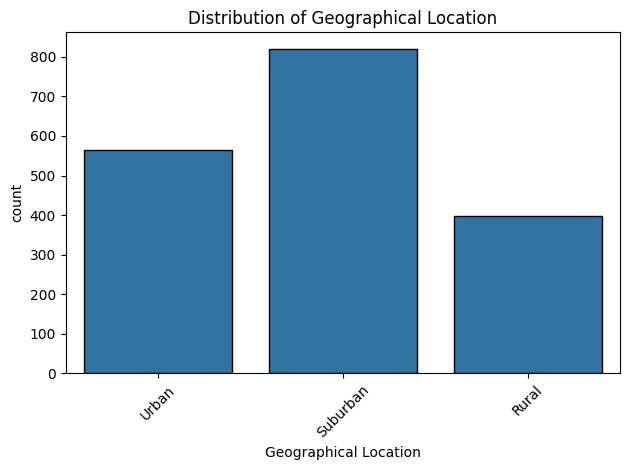

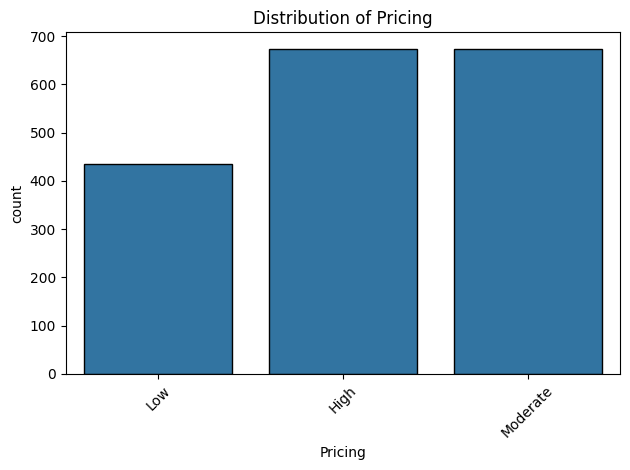

In [ ]:
# Visualization of Preparation Method distribution
sns.countplot(data=df, x="Preparation Method", edgecolor='black')
plt.title("Distribution of Preparation Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Geographical Location distribution
sns.countplot(data=df, x="Geographical Location", edgecolor='black')
plt.title("Distribution of Geographical Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Pricing distribution
sns.countplot(data=df, x="Pricing", edgecolor='black')
plt.title("Distribution of Pricing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Model selection and making

# Features Selection
df['waste_ratio'] = df['Wastage Food Amount'] / df['Quantity of Food']
df['guests_per_food'] = df['Number of Guests'] / df['Quantity of Food']


# Target
y = df["Wastage Food Amount"]

# Baseline features
X = df[[
    "Number of Guests",
    "Quantity of Food",
    # engineered:
    "waste_ratio",
    "guests_per_food",
    # plus categorical:
    "Event Type",
    "Type of Food",
    "Storage Conditions",
    "Seasonality"
]]

# Building the The Model :-
1.	Splitting the Data: I split my data into a "training set" (80%) and "testing set" (20%).
2.	Preparing the Data for the Model: Computers only understand numbers, so I had to translate text-based columns like "Event Type" into a numerical format. I used a standard technique called One-Hot Encoding. I bundled this step into a "pipeline" to keep everything organized.

3.	Trying Different Models: I didn’t just build one model but I used four different types of Model (Linear Regression, Decision Tree, Random Forest, and Gradient Boosting). to see whick model works best for making a prediction.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = ["Number of Guests","Quantity of Food","waste_ratio","guests_per_food"]
cat_cols = ["Event Type","Type of Food","Storage Conditions","Seasonality"]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [ ]:
#  Preprocessing: numeric scaling + one-hot for categoricals

# Define the list of all feature columns
FEATURES = ["Number of Guests", "Quantity of Food",
            "waste_ratio", "guests_per_food", "Event Type",
            "Type of Food", "Storage Conditions", "Seasonality"]

numeric_feats = ["Number of Guests", "Quantity of Food",
                 "waste_ratio", "guests_per_food"]

categorical_feats = list(set(FEATURES) - set(numeric_feats))

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_feats),
            ("cat", categorical_transformer, categorical_feats)
])

In [ ]:
#  Baseline Model 1 – Linear Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import r2_score, MAE, MSE
from sklearn.linear_model import LinearRegression # Import LinearRegression

lin_pipeline = Pipeline(steps=[("prep", preprocessor),
                               ("model", LinearRegression())])

lin_pipeline.fit(X_train, y_train)
lin_pred = lin_pipeline.predict(X_test)

def report(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred)) # Removed squared=False
    print("R²  :", r2_score(y_true, y_pred))

report(y_test, lin_pred, "Linear Regression")


Linear Regression
MAE : 0.8745036748988053
RMSE: 1.2718259543470125
R²  : 0.9877305321354017


In [ ]:
#  Model 2 – Random Forest with Hyperparameter Search
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

rf_params = {
    "model__n_estimators": [100, 250, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[("prep", preprocessor),
                              ("model", rf)])

rf_search = RandomizedSearchCV(rf_pipeline, rf_params,
                               n_iter=10, cv=5,
                               scoring="neg_mean_absolute_error",
                               random_state=42, n_jobs=-1)

rf_search.fit(X_train, y_train)
rf_pred = rf_search.best_estimator_.predict(X_test)
report(y_test, rf_pred, "Random Forest (tuned)")


Random Forest (tuned)
MAE : 0.03619285289873526
RMSE: 0.1411740543090055
R²  : 0.9986380758178908


In [ ]:
# 14. Model 3 – Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr_params = {
    "model__n_estimators": [200, 400, 600],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [2, 3, 4]
}

gbr_pipeline = Pipeline(steps=[("prep", preprocessor),
                               ("model", gbr)])

gbr_search = RandomizedSearchCV(gbr_pipeline, gbr_params,
                                n_iter=10, cv=5,
                                scoring="neg_mean_absolute_error",
                                random_state=42, n_jobs=-1)

gbr_search.fit(X_train, y_train)
gbr_pred = gbr_search.best_estimator_.predict(X_test)
report(y_test, gbr_pred, "Gradient Boosting (tuned)")


Gradient Boosting (tuned)
MAE : 0.019052334413053193
RMSE: 0.0377915226433592
R²  : 0.9996354203410914


In [ ]:
# Model 4 – Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt_pipeline = Pipeline(steps=[("prep", preprocessor),
                               ("model", dt)])

dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)
report(y_test, dt_pred, "Decision Tree")


Decision Tree
MAE : 0.03081232492997199
RMSE: 0.14285714285714285
R²  : 0.9986218388471133


In [ ]:
# 4) Define models to compare
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree":     DecisionTreeRegressor(random_state=42),
    "RandomForest":     RandomForestRegressor(n_estimators=100, random_state=42),
    "GBM":              GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 5) Train, predict, and evaluate


for name, estimator in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", estimator)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    # Use the report function to print metrics
    report(y_test, preds, name)


LinearRegression
MAE : 0.8745036748988053
RMSE: 1.2718259543470125
R²  : 0.9877305321354017

DecisionTree
MAE : 0.03081232492997199
RMSE: 0.14285714285714285
R²  : 0.9986218388471133

RandomForest
MAE : 0.03408963585434173
RMSE: 0.12294817927170867
R²  : 0.9988139031685671

GBM
MAE : 0.14510204052600817
RMSE: 0.048992739099737725
R²  : 0.9995273607713946


# Summary:-
After training each model, I used the "testing set" to see how accurate the predictions were. The main grade that i used was the metric R-squared (R²) and found out that gradient boosting method is the best among all the methods.